In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [6]:
image_gen.flow_from_directory('CzyNero/train')
input_shape= (150,150,3)

Found 343 images belonging to 2 classes.


In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [14]:
batch_size=16

train_image_gen = image_gen.flow_from_directory('CzyNero/train',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 351 images belonging to 2 classes.


In [15]:
test_image_gen = image_gen.flow_from_directory('CzyNero/test',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 63 images belonging to 2 classes.


In [16]:
train_image_gen.class_indices

{'DOG': 0, 'NERO': 1}

In [17]:
results = model.fit_generator(train_image_gen,epochs=150,steps_per_epoch=15,
                             validation_data=test_image_gen,validation_steps=12)

Epoch 1/150
15/15 [==============================] - 22s 1s/step - loss: 0.7301 - acc: 0.5436 - val_loss: 0.6841 - val_acc: 0.6190
Epoch 2/150
15/15 [==============================] - 22s 1s/step - loss: 0.6562 - acc: 0.6458 - val_loss: 0.8451 - val_acc: 0.4921
Epoch 3/150
15/15 [==============================] - 22s 1s/step - loss: 0.6251 - acc: 0.6577 - val_loss: 0.7030 - val_acc: 0.6032
Epoch 4/150
15/15 [==============================] - 22s 1s/step - loss: 0.5285 - acc: 0.7533 - val_loss: 0.7207 - val_acc: 0.6032
Epoch 5/150
15/15 [==============================] - 23s 2s/step - loss: 0.5016 - acc: 0.7458 - val_loss: 0.8157 - val_acc: 0.6508
Epoch 6/150
15/15 [==============================] - 21s 1s/step - loss: 0.4128 - acc: 0.8237 - val_loss: 0.6346 - val_acc: 0.7143
Epoch 7/150
15/15 [==============================] - 22s 1s/step - loss: 0.4301 - acc: 0.8083 - val_loss: 0.7263 - val_acc: 0.7302
Epoch 8/150
15/15 [==============================] - 21s 1s/step - loss: 0.4432 - a

In [34]:
plt.plot(results.history['acc'])
#model.save('CzyNero.h5')

NameError: name 'results' is not defined

In [36]:
from keras.preprocessing import image
import numpy as np

In [38]:
nero_file = 'test/NERO/nero.jpg'
nero_img = image.load_img(nero_file,target_size=(150,150))
nero_img = image.img_to_array(nero_img)
nero_img = np.expand_dims(nero_img,axis=0)
nero_img=nero_img/255

In [39]:
nero_img.shape

(1, 150, 150, 3)

In [40]:
check = model.predict_classes(nero_img)

In [41]:
model.predict(nero_img)

array([[0.9794398]], dtype=float32)

In [42]:
check

array([[1]])

In [79]:
type(check)

numpy.ndarray

In [85]:
if check.item(0)==1:
    print ("NERO")

NERO


In [86]:
def convert_file(file):
    img = image.load_img(file,target_size=(150,150))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = img/255
    return img

In [88]:
def check_dog(img):
    check = model.predict_classes(img)
    if check.item(0)==1:
        print("NERO")
    else:
        print("Some other dog")

In [89]:
file = 'CzyNero/test/DOG/owczarek.jpg'

In [90]:
img = convert_file(file)

In [91]:
check_dog(img)

Some other dog


In [92]:
file = 'CzyNero/test/NERO/test.jpg'

In [93]:
nero_img = convert_file(file)

In [94]:
check_dog(nero_img)

Some other dog


In [43]:
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np

from keras.models import load_model
from keras.preprocessing import image


model = load_model('CzyNero.h5')


def convert_file(file):
    img = image.load_img(file,target_size=(150,150))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = img/255
    return img

def check_dog(img):
    check = model.predict_classes(img)
    if check.item(0)==1:

        print("NERO")
    else:
        print("Some other dog")

In [44]:
file = 'test/NERO/nero_test5.jpg'

In [45]:
nero_img = convert_file(file)

In [46]:
check_dog(nero_img)

Some other dog


In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)
    
nero_cascade = cv2.CascadeClassifier('nero-detector.xml')

def detect_nero(img):
    nero_img = img.copy()
    nero_rects = nero_cascade.detectMultiScale(nero_img,scaleFactor=1.5, minNeighbors=2, minSize=(100,100)) 
    
    for (x,y,w,h) in nero_rects: 
        cv2.rectangle(nero_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return nero_img


In [80]:
img = cv2.imread('test/NERO/DSC_0840.jpg')

In [81]:
result = detect_nero(img)

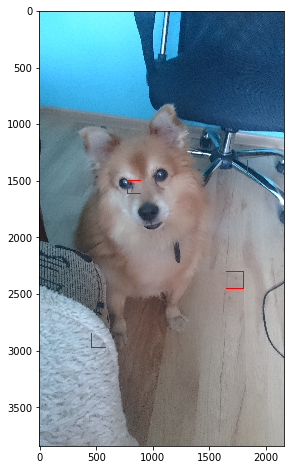

In [82]:
display(result)